<a href="https://colab.research.google.com/github/vu-topics-in-big-data-2022/examples/blob/main/example-parquet/Parquet_with_BigQuery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Like Amazon's Athena, Google also has a query engine called BigQuery that supports myriads of datasets including CSV, Json, Avro, Parquet etc.

For our purposes, we will use the `stocks.parquet` file that we used earlier in the Athena notebook. As before, this notebook is only demonstrative. But if you are interested in reproducing the workflow here, the parquet file will be provided upon request.

# Step 1: Upload parquet to Cloud Storage.

Open up the Google Cloud Console and search for Cloud Storage. Click the topmost result and you will be greeted with the Cloud Storage dashboard. Click the Create bucket button.

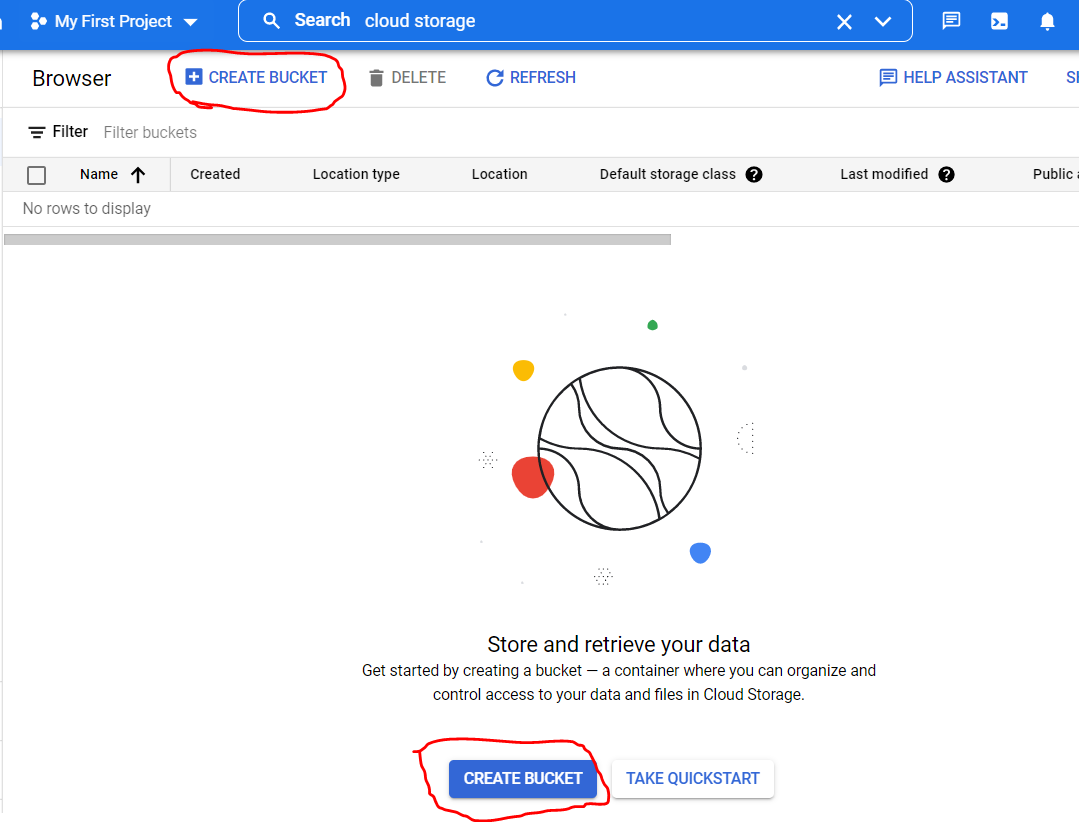

Give a unique name to your bucket and leave the rest of the options default. Click on the Create button and you'll now have a bucket.

Click on the Upload File button and select your parquet file and upload it.

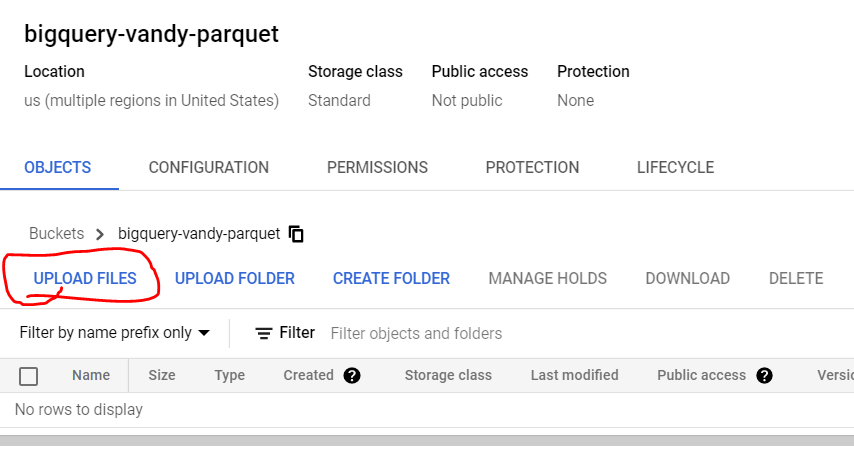

Once the parquet file has been uploaded, go to the Google Console's search bar and search for BigQuery. Click on the first results.

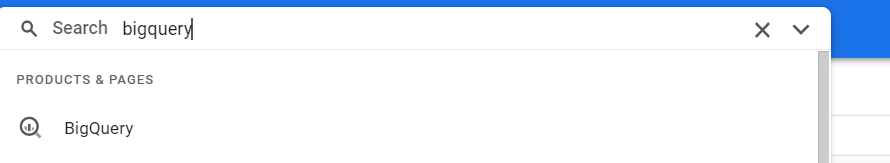

You'll be taken to the BigQuery's dashboard which will have a Query Editor and bunch of other different controls. Take some time to familiarize yourself with the screen.

# Step 2: Create BigQuery Table
Once you've opened the BigQuery console, now you'll be able to create a table and connect it to your parquet file. For this, first of all, you'll have to create a dataset.

In the left pane named Explorer, select your project and click on the more button to show the Create Dataset button. Click the Create Dataset button.

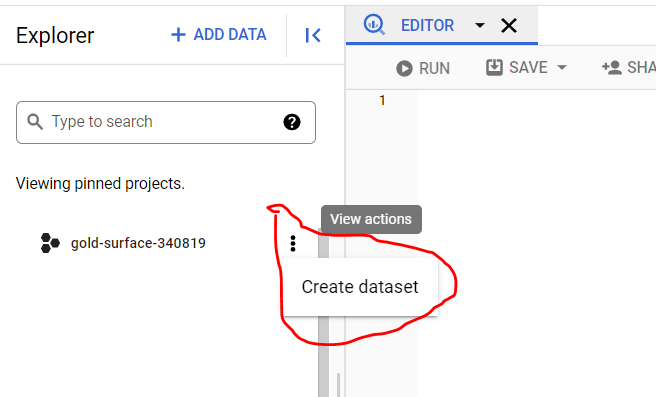

Specify a unique name for your dataset. The region should be US (although this'll change if you've specified the region otherwise while creating the Cloud Storage bucket) and click the Create button.

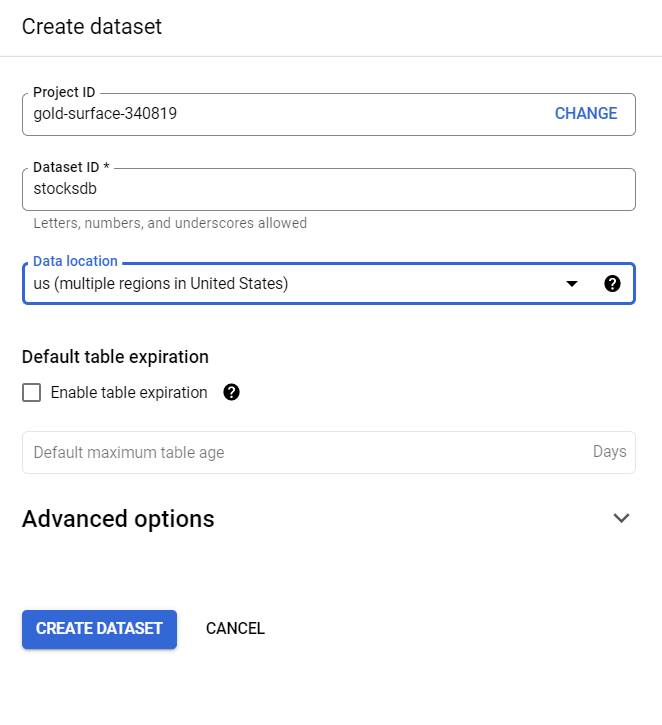

Once you have created the dataset, your Explorer pane on the left would have the dataset listed under your project. Select that dataset -> click on the more button and click the Create Table button.

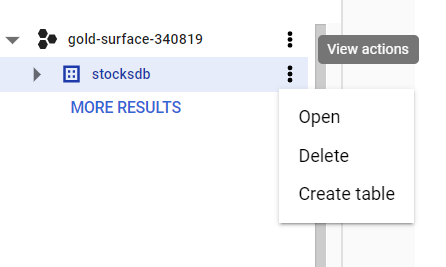

Select the source as Google Cloud Storage

Select the parquet file by clicking the Browse button.

Give a unique name to the Table

Leave the other options as it is.

Click on the Create Table button. Unlike S3, Google would automatically infer the schema from your parquet file.


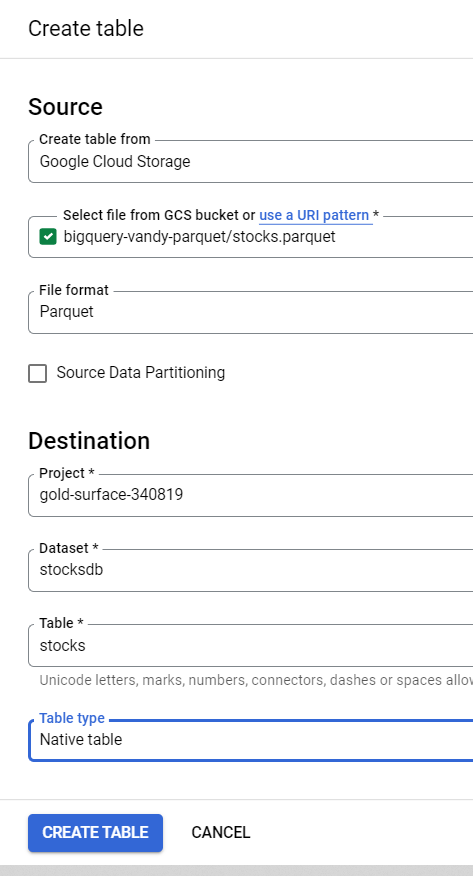

Once you do that, a load job will be created. Wait for the job to finish. Once it is done, you will have created a table from the parquet file that you can query using BigQuery.

# Step 3: Query the Parquet using python

All Google Cloud related actions are achieved via the google cloud python library. The cells below will show you how to install the library and use it to run queries on your tables that you loaded from the parquet files.

In [ ]:
!pip install google-cloud-bigquery
!pip install google-cloud-core

  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 2.3.0
    Uninstalling google-cloud-core-2.3.0:
      Successfully uninstalled google-cloud-core-2.3.0


To start querying your table using BigQuery, you'll first need to create a Service Account. There is a default account already set when you create the Google Cloud account for the first time so you can use that as well. Go to the console, search for "Service Accounts" and click the top result.

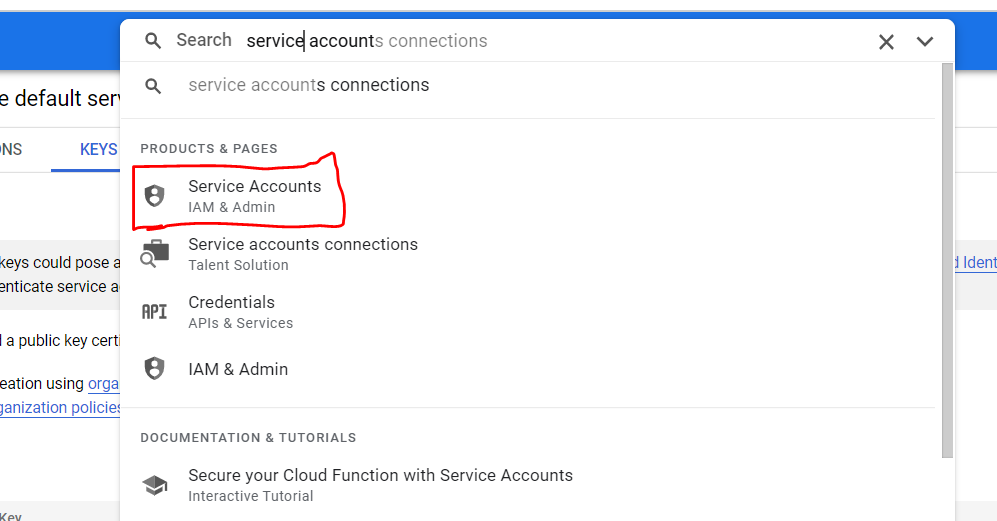

Click on Create Service account button at the top and enter the name of the account (the id will be generated for you by default). Click on Create and Continue.

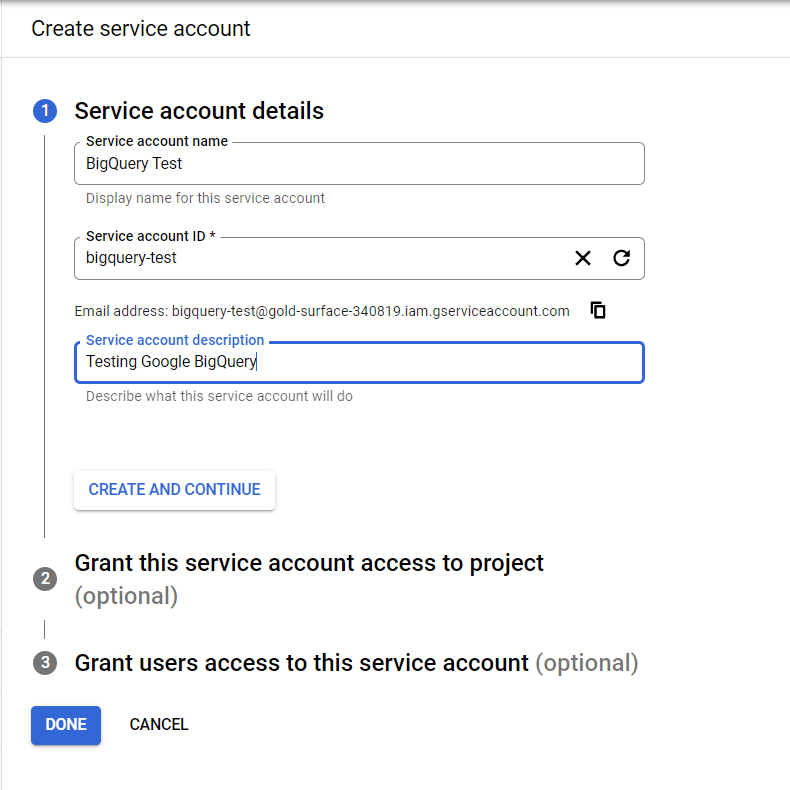

# Grant Access to Service Account

Provide Owner access to your Service Account. Remember, in production and in industry, the access controls are more fine-tuned and a service account is only provided access on need basis. For this demonstration, we'll keep things simple by giving it the full permission.

- Click on ADD ROLES
- Select Basic -> Owner
- Click on Done

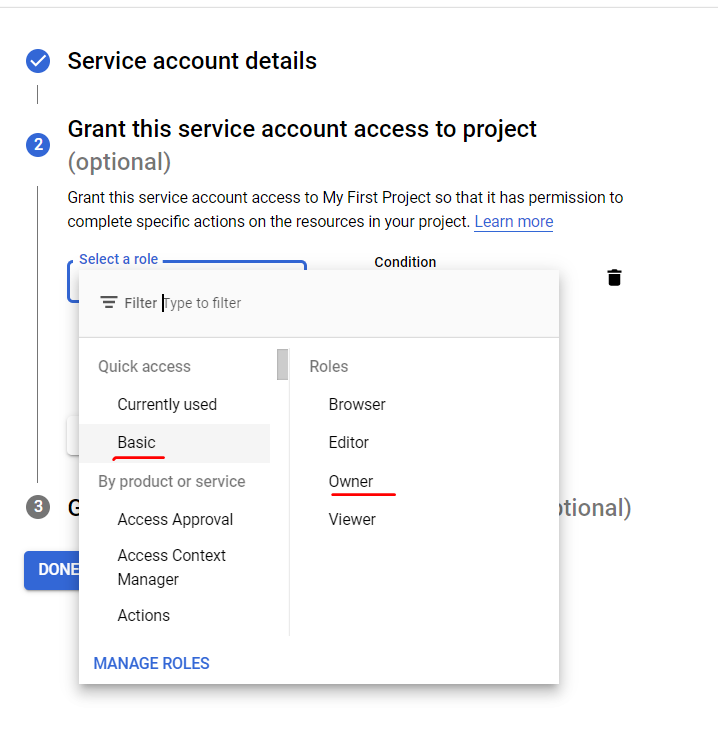



---



---



# Generate Keys

Once the account is created, select the account in the Dashboard, Click on Keys and Click on Add Keys and Create a new key.

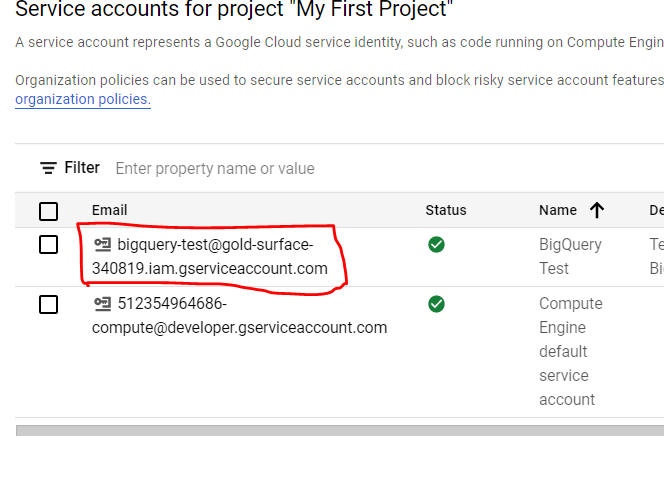

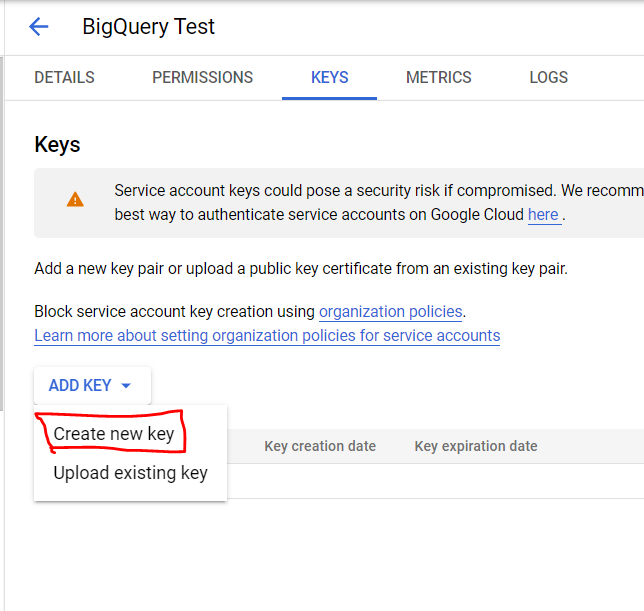



---



Select JSON and click Create.

A new json file will be downloaded to your local computer automatically. If you are doing your analysis locally then you should extract the full path of the json file.

If you are doing your analysis on colab, you may have to upload your json file to colab before proceeding.

Assuming that your secret key is stored in the `path-to-your-json.json` file, execute the following cells for authenticating your BigQuery client.



---



In [ ]:
secret_key_path="/content/secret_key.json"   # Enter path here!

In [ ]:
import datetime

from google.cloud import bigquery

client = bigquery.Client.from_service_account_json(secret_key_path)

Now we have access to BigQuery services! Let's run a simple query on our stocks table.

In [ ]:
job = client.query("Select sum(open) from stocksdb.stocks;")

Allow the query to run for a while. You can also do advanced operations such as callbacks etc to be notified when the job completes. Refer to BigQuery documentation for full list of features.

In [ ]:
# Get the results
for row in job.result():
  print (row)

Row((1877856564794665.2,), {'f0_': 0})


This concludes the tutorial on using Parquet with Google's BigQuery. Best of luck !